### Tässä notebookissa tehdään täysin samat asiat, kuin mitä 2_clean_data.ipynb -notebookissa. 
### Ainoana erotuksena on, että tässä siivotaan pois myös LämmitysS -sarakkeesta äkilliset nousut, sekä poistetaan kaikki data myös kesän ajalta.

In [1]:
import sys
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(style="darkgrid")


warnings.filterwarnings('ignore')
sys.path.append("../Moduulit/modules")
sys.path.append("../Datat/Mittaukset")
sys.path.append("../Datat/koskemattomat_csv")
sys.path.append("../Datat/csv")

In [2]:
df = pd.read_csv("../Datat/uudet/csv/uusi_df.csv")

amounts = {}
amounts["Alussa"] = len(df)
df

,timestamp,trendFlags_MenovesiLaskAs,status_MenovesiLaskAs,value_MenovesiLaskAs,trendFlags_TuloilmaLaskettuAs,status_TuloilmaLaskettuAs,value_TuloilmaLaskettuAs,trendFlags_LammitysS,status_LammitysS,value_LammitysS,...,value_MenoM,trendFlags_PoistoM,status_PoistoM,value_PoistoM,trendFlags_PatterinPaluuvesiM,status_PatterinPaluuvesiM,value_PatterinPaluuvesiM,trendFlags_LTOS,status_LTOS,value_LTOS
0,2020-05-18 20:30:00,{ },{ok},28.65,{ },{ok},20.64,{ },{ok},22.30,...,29.31,{ },{ok},21.65,{ },{ok},22.22,{ },{ok},100.0
1,2020-05-18 20:30:00,{ },{ok},28.65,{ },{ok},20.64,{ },{ok},22.30,...,28.80,{ },{ok},21.65,{ },{ok},22.22,{ },{ok},100.0
2,2020-05-18 20:31:00,{ },{ok},28.65,{ },{ok},20.64,{ },{ok},22.30,...,28.21,{ },{ok},21.65,{ },{ok},22.22,{ },{ok},100.0
3,2020-05-18 20:31:00,{ },{ok},28.65,{ },{ok},20.64,{ },{ok},22.30,...,27.52,{ },{ok},21.65,{ },{ok},22.22,{ },{ok},100.0
4,2020-05-18 20:31:00,{ },{ok},28.65,{ },{ok},20.64,{ },{ok},22.30,...,28.33,{ },{ok},21.65,{ },{ok},22.22,{ },{ok},100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116948,2021-05-07 07:52:00,{ },{ok},39.53,{ },{ok},22.68,{ },{ok},4.58,...,39.30,{ },{ok},19.85,{ },{ok},24.57,{ },{ok},0.0
1116949,2021-05-07 07:56:00,{ },{ok},39.53,{ },{ok},22.68,{ },{ok},4.58,...,38.70,{ },{ok},19.85,{ },{ok},24.57,{ },{ok},0.0
1116950,2021-05-07 07:56:00,{ },{ok},39.53,{ },{ok},22.68,{ },{ok},4.58,...,38.07,{ },{ok},19.85,{ },{ok},24.57,{ },{ok},0.0
1116951,2021-05-07 07:57:00,{ },{ok},39.53,{ },{ok},22.68,{ },{ok},4.58,...,38.93,{ },{ok},19.85,{ },{ok},24.57,{ },{ok},0.0


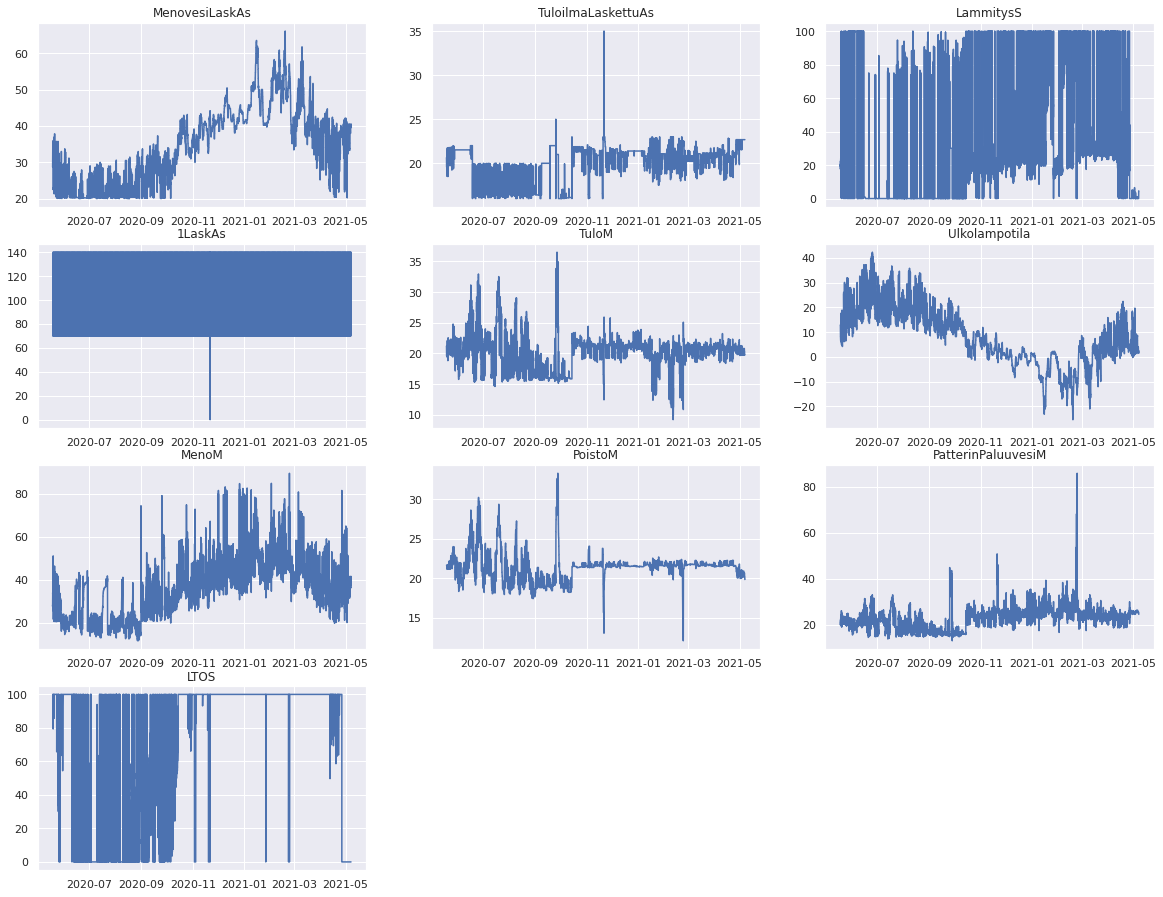

In [3]:
from check_plot import check_plot
check_plot(df)

### Poistetaan aluksi venttiilin säätöarvoissa olevat piikit

In [4]:
from spikes import remove_lammitysS_spikes
df = remove_lammitysS_spikes(df)
df.drop(columns=["value_difference_LammitysS"], inplace=True)
amounts["LammitysS piikit"] = len(df)

Poistettu rivejä: 55960


### Poistetaan rivit, jolloin kone on ollut sammuksissa

In [5]:
from LaskAs_drop import laskas_drop
df = laskas_drop(df)
amounts["Kone Sammuksissa"] = len(df)


All rows:  (1060993, 31)

Checking the column 'value_1LaskAs' for NaN values:  0

Checking the rows for 0 values:  (5, 31)

-----------------------------------------
Removing all rows that contain a 0 value
-----------------------------------------

New all rows:  (1060988, 31)

Done in 0.49 seconds


### Poistetaan rivit, jolloin LTO:N arvo < 100

In [6]:
from LTOS_value_drop import value_siivous
df = value_siivous(df)
amounts["LTO < 100"] = len(df)

rows at the start:  1060988
check how many NaN values there are and remove them:  0
remove all rows where value_LTOS is under 100
rows after operation:  636083


### Poistetaan virheelliset status-arvot

In [7]:
from check_status import checkstatus
df = checkstatus(df)

amounts["Virheelliset Statukset"] = len(df)

Checking all status-columns...

DataFrame's shape before operation: (636083, 31) 


------------------------

Column: status_MenovesiLaskAs
Values: ['{ok}']

------------------------

Column: status_TuloilmaLaskettuAs
Values: ['{ok}' '{overridden}']

------------------------

Column: status_LammitysS
Values: ['{ok}' '{fault}']
Dropping {fault} -rows...

------------------------

Column: status_1LaskAs
Values: ['{ok}']

------------------------

Column: status_TuloM
Values: ['{ok}' '{fault}' '{down}']
Dropping {fault} -rows...
Dropping {down} -rows...

------------------------

Column: status_Ulkolampotila
Values: ['{ok}' '{fault}']
Dropping {fault} -rows...

------------------------

Column: status_MenoM
Values: ['{ok}' '{fault}']
Dropping {fault} -rows...

------------------------

Column: status_PoistoM
Values: ['{ok}' '{fault}' '{down}']
Dropping {fault} -rows...
Dropping {down} -rows...

------------------------

Column: status_PatterinPaluuvesiM
Values: ['{ok}' '{fault}' '{down}']

### Poistetaan kesäkuukaudet

In [8]:
from delete_months import delete_summer_months
df = delete_summer_months(df)
amounts["Kesakuukaudet"] = len(df)

### Poistetaan Marraskuun outlierit

In [9]:
from scipy.stats import zscore
z_scores = zscore(df[["value_PatterinPaluuvesiM","value_PoistoM"]])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

amounts["Marraskuun outlierit"] = len(df)

### Normalisoidaan data

In [10]:
for col in df.columns:
    if "value" in col and "MenovesiLaskAs" not in col:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())    

## Katsotaan miltä siivottu data näyttää

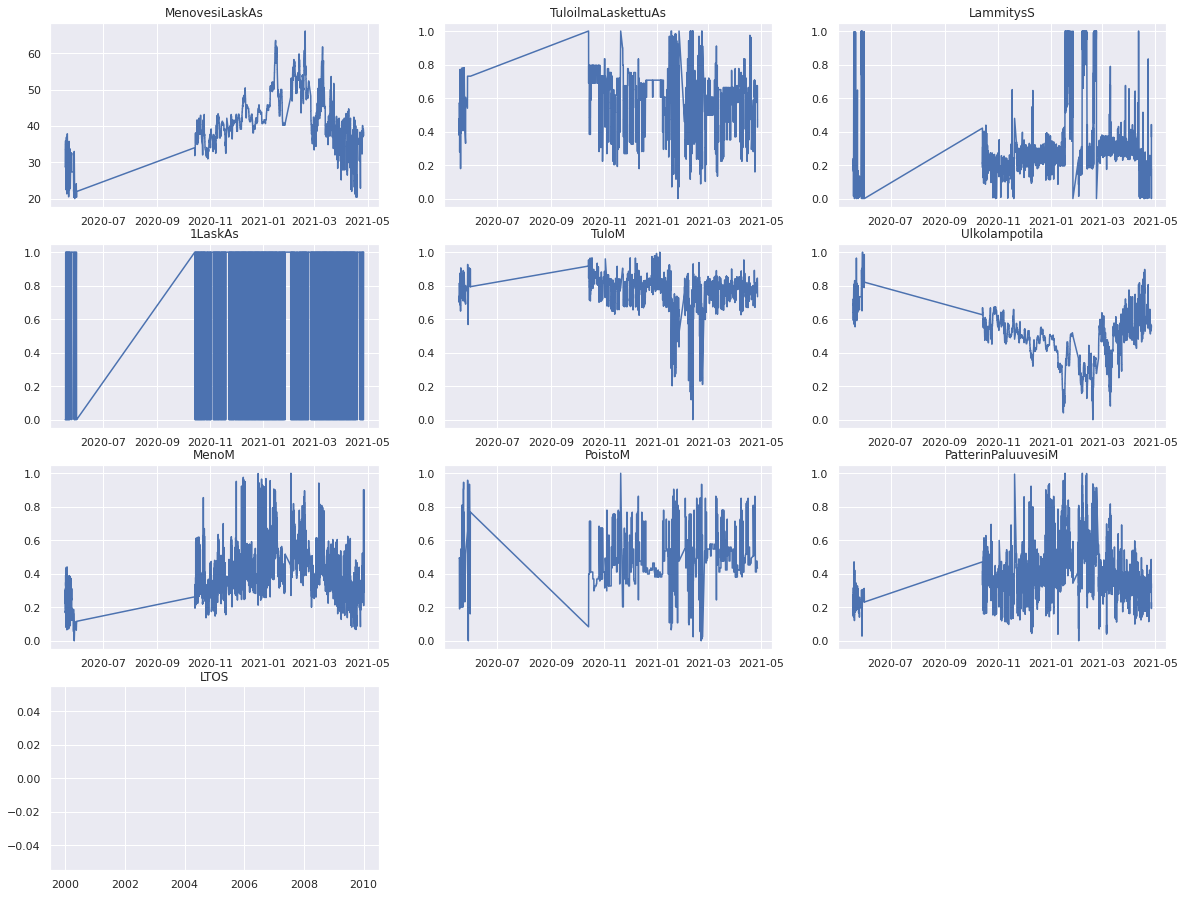

In [11]:
check_plot(df)

### Poistetaan duplikaatit datasta

In [12]:
print(len(df))
df = df.drop_duplicates()
duplikaatit = len(df)
amounts["Duplikaatit"] = duplikaatit
print(len(df))

617626
611315


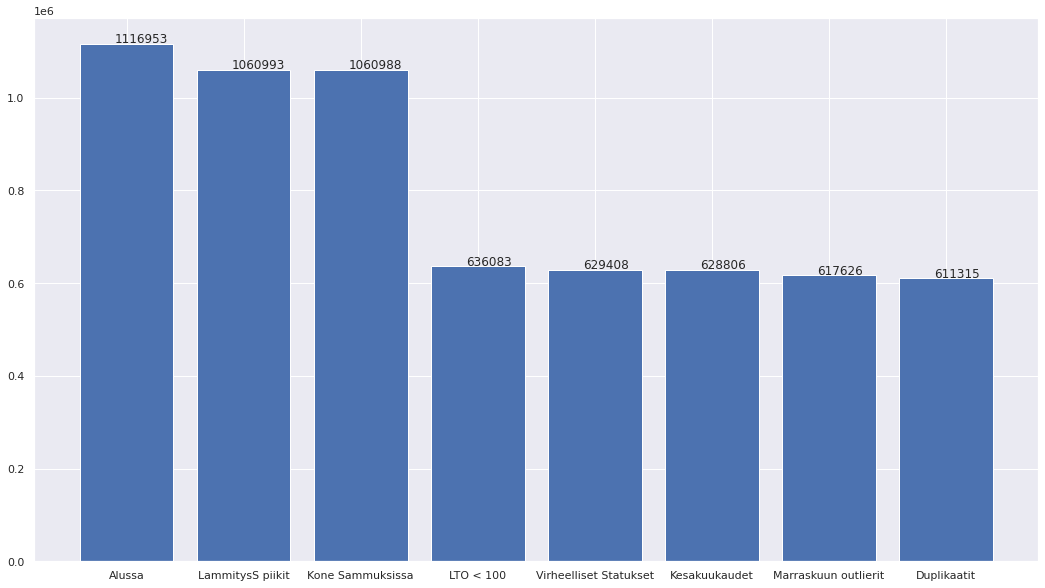

In [13]:
dataa = pd.DataFrame(amounts.items(), columns=["Operaatio", "Rivimaara"])
dataa.index = dataa.Operaatio
plt.figure(figsize=(18,10))

plt.bar(dataa.index, dataa.Rivimaara);
for i in range(len(dataa.Rivimaara)):
    plt.annotate(dataa.Rivimaara[i], (-0.1 + i, dataa.Rivimaara[i] + 2000))

### Poistetaan ylimääräiset sarakkeet 

In [14]:
from drop_columns import drop_columns
df = drop_columns(df)

-------------------------------------------------------------
---------------- Removing useless columns -------------------
-------------------------------------------------------------


 Dataframe now:



,timestamp,value_MenovesiLaskAs,value_TuloilmaLaskettuAs,value_LammitysS,value_1LaskAs,value_TuloM,value_Ulkolampotila,value_MenoM,value_PoistoM,value_PatterinPaluuvesiM
0,2020-05-18 20:30:00,28.65,0.570128,0.223,0.0,0.813407,0.71912,0.19374,0.494048,0.273815
1,2020-05-18 20:30:00,28.65,0.570128,0.223,0.0,0.813407,0.71912,0.18635,0.494048,0.273815
2,2020-05-18 20:31:00,28.65,0.570128,0.223,0.0,0.813407,0.71912,0.17780,0.494048,0.273815




Done in 1.1 seconds.


### Erotetaan testisettiin kaikki data, joka on kerätty aikaleiman '2021-02-15 11:21:00' jälkeen.
Saimme tuon päivämäärän jälkeisen datan uutena datana loppuvaiheessa projektia, ja päätimme irrottaa sen suoraan testisettiin.


In [15]:
test_df = df[df["timestamp"] > '2021-02-15 11:21:00']
df1 = df[df["timestamp"] <= '2021-02-15 11:21:00']
df

,timestamp,value_MenovesiLaskAs,value_TuloilmaLaskettuAs,value_LammitysS,value_1LaskAs,value_TuloM,value_Ulkolampotila,value_MenoM,value_PoistoM,value_PatterinPaluuvesiM
0,2020-05-18 20:30:00,28.65,0.570128,0.2230,0.0,0.813407,0.719120,0.193740,0.494048,0.273815
1,2020-05-18 20:30:00,28.65,0.570128,0.2230,0.0,0.813407,0.719120,0.186350,0.494048,0.273815
2,2020-05-18 20:31:00,28.65,0.570128,0.2230,0.0,0.813407,0.719120,0.177800,0.494048,0.273815
3,2020-05-18 20:31:00,28.65,0.570128,0.2230,0.0,0.813407,0.719120,0.167802,0.494048,0.273815
4,2020-05-18 20:31:00,28.65,0.570128,0.2230,0.0,0.813407,0.719120,0.179539,0.494048,0.273815
...,...,...,...,...,...,...,...,...,...,...
636078,2021-04-26 10:55:00,37.34,0.426230,0.3681,1.0,0.733932,0.562136,0.736125,0.434524,0.228928
636079,2021-04-26 10:55:00,37.34,0.426230,0.3681,1.0,0.733932,0.562136,0.858426,0.434524,0.192519
636080,2021-04-26 10:55:00,37.34,0.426230,0.3681,1.0,0.733932,0.562136,0.858426,0.434524,0.228928
636081,2021-04-26 10:55:00,37.34,0.426230,0.3681,1.0,0.733932,0.562136,0.902333,0.434524,0.192519


### Jaetaan data treeni- validointisetteihin.
Validointisettiin erotetaan joka viides päivä. Validointisettiin tulee ehkä hieman turhan paljon dataa, mutta näin siihen saadaan tasaisesti dataa eri päiviltä.
Setteihin halutaan dataa päiväkohtaisesti, koska datassa on peräkkäisten rivien välillä hyvin pientä vaihtelua. 
Neuroverkon oppimista ei saisi seurattua ihan yhtä hyvin, jos data jaettaisiin treeni- ja validointisettihin täysin satunnaisesti, koska silloin oppimista seurattaisiin lähes samalla datalla, jolla sitä on opetettu.

In [16]:
from split_by_day import split_by_day
train_df, val_df = split_by_day(df1, 5)

Pienemmän datasetin osuus koko datasta: 0.17


### Tarkistetaan kuinka data on jakautunut eri setteihin.

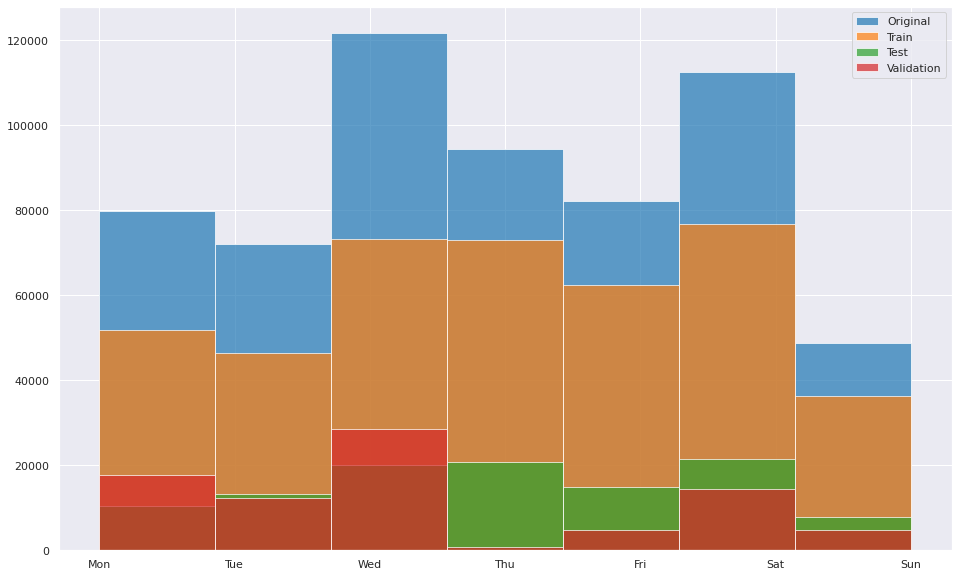

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("tab10")
df["weekday"] = df.timestamp.dt.strftime('%a')
train_df["weekday"] = train_df.timestamp.dt.strftime('%a')
test_df["weekday"] = test_df.timestamp.dt.strftime('%a')
val_df["weekday"] = val_df.timestamp.dt.strftime('%a')

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.hist(df["weekday"], 7, alpha=0.7);
ax.hist(train_df["weekday"], 7, alpha=0.7);
ax.hist(test_df["weekday"], 7, alpha=0.7);
ax.hist(val_df["weekday"], 7, alpha=0.7);
plt.legend(["Original","Train", "Test", "Validation"]);

df.drop(columns=["weekday"], inplace=True)
train_df.drop(columns=["weekday"], inplace=True)
test_df.drop(columns=["weekday"], inplace=True)
val_df.drop(columns=["weekday"], inplace=True)

### Tarkistetaan vielä, ettei varmasti ole duplikaatteja.

In [18]:
print(len(train_df))
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True)
print(len(train_df))

print(len(val_df))
val_df.drop_duplicates(inplace=True)
val_df.reset_index(drop=True)
print(len(val_df))

print(len(test_df))
test_df.drop_duplicates(inplace=True)
test_df.reset_index(drop=True)
print(len(test_df))

419631
419631
83223
83223
108461
108461


### Jaetaan datasetit

In [19]:
y_train = train_df["value_MenovesiLaskAs"]
X_train = train_df.drop(['value_MenovesiLaskAs', "timestamp"], axis=1)

y_test = test_df["value_MenovesiLaskAs"]
X_test = test_df.drop(['value_MenovesiLaskAs', "timestamp"], axis=1)

y_val = val_df["value_MenovesiLaskAs"]
X_val = val_df.drop(['value_MenovesiLaskAs', "timestamp"], axis=1)

### Tallennetaan tiedostoihin

In [20]:
X_train.to_csv(f"../Datat/over_clean/X_train.csv", index=False)
y_train.to_csv(f"../Datat/over_clean/y_train.csv", index=False)
X_test.to_csv(f"../Datat/over_clean/X_test.csv", index=False)
y_test.to_csv(f"../Datat/over_clean/y_test.csv", index=False)
X_val.to_csv(f"../Datat/over_clean/X_val.csv", index=False)
y_val.to_csv(f"../Datat/over_clean/y_val.csv", index=False)